In [651]:
!git clone https://github.com/AnghelutaRazvan/AI-UBB.git

fatal: destination path 'AI-UBB' already exists and is not an empty directory.


In [652]:
fileNAME = '/content/AI-UBB/Lab07/v1_world-happiness-report-2017.csv'

In [653]:
def readFile(fileName):
  date = {}

  file = open(fileName)
  header = file.readline()[:-1].split(',')
  for h in header:
    if '"' in h:
      date[h[1:-1]] = []
    else:
      date[h] = []

  line = '0'
  while line != '' and line != '\n':
    line = file.readline()
    cuvs = line.split('"')
    newcuvs = []

    for cs in cuvs:
      if len(cuvs) == 1:
        newcuv = cs.strip('\n').split(',')
        #print(newcuv)
        for nc in newcuv:
          if nc != '' and nc != '' and nc != ',':
            try:
              newcuvs.append(float(nc))
            except:
              newcuvs.append(nc)

      elif len(cs) > 0:
        if cs[0] == ',':
          newcuv = cs.strip('\n').split(',')
          #print(newcuv)
          for nc in newcuv:
            if nc != '' and nc != '' and nc != ',':
              try:
                newcuvs.append(float(nc))
              except:
                newcuvs.append(nc)
        elif cs != '' and cs != '' and cs != ',':
          try:
            newcuvs.append(float(cs))
          except:
            newcuvs.append(cs)
        
    #print(newcuvs)
    #print(len(newcuvs), len(header))
    #print(newcuvs)
    for i in range(len(newcuvs)):
      if '"' in header[i]:
        date[header[i][1:-1]].append(newcuvs[i])
      else:
        date[header[i]].append(newcuvs[i])

  file.close()
      
    

  return date

In [654]:
data = readFile(fileNAME)
data.keys()

dict_keys(['Country', 'Happiness.Rank', 'Happiness.Score', 'Whisker.high', 'Whisker.low', 'Economy..GDP.per.Capita.', 'Family', 'Health..Life.Expectancy.', 'Freedom', 'Generosity', 'Trust..Government.Corruption.', 'Dystopia.Residual'])

In [655]:
import numpy as np

In [656]:
fericire = data['Happiness.Score']
GDP = data['Economy..GDP.per.Capita.']
libertate = data['Freedom']

In [657]:
pAntrenament = 0.7
nAntrenament = int(len(fericire)*pAntrenament)

In [658]:
fericireAntrenament = fericire[:nAntrenament]
GDPAntrenament = GDP[:nAntrenament]
libertateAntrenament = libertate[:nAntrenament]

In [659]:
X = np.array([[1, g, l] for g, l in zip(GDPAntrenament, libertateAntrenament)])
Y = np.array([f for f in fericireAntrenament])

In [660]:
beta = np.dot((np.linalg.inv(np.dot(X.T,X))), np.dot(X.T,Y))
beta

array([3.14094063, 1.35981951, 2.70991149])

In [661]:
W = np.linalg.inv(np.matmul(X.T, X))
W = np.matmul(W, np.matmul(X.T, Y))
W

array([3.14094063, 1.35981951, 2.70991149])

In [662]:
import matplotlib.pyplot as plt

In [663]:
elev, azim = 40, 100

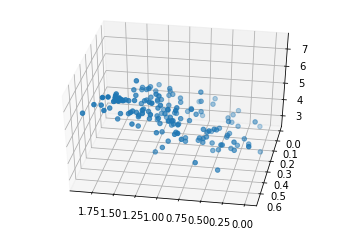

In [664]:
fig = plt.figure()
ax = plt.axes(projection='3d')

ax.view_init(elev=elev, azim=azim)
ax.scatter3D(GDP, libertate, fericire)

In [665]:
def fericireF(x1, x2):
  return W[0] + W[1]*x1 +W[2]*x2

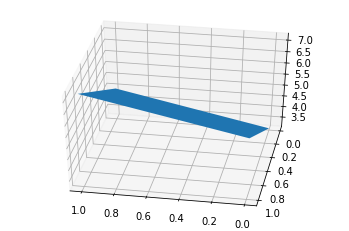

In [666]:
fig = plt.figure()
ax = plt.axes(projection='3d')

xx1, xx2 = np.meshgrid(range(2), range(2))
z = fericireF(xx1, xx2)

ax.view_init(elev=elev, azim=azim)
ax.plot_surface(xx1, xx2, z)

In [667]:
from math import sqrt

In [668]:
def MeanAbsError(a, b):
  err = 0
  n = len(a)
  for i in range(n):
    err += abs(a[i] - b[i])
  return err/n

In [669]:
def RootMeanSqError(a, b):
  err = 0
  n = len(a)
  for i in range(n):
    err += (a[i] - b[i])**2
  return sqrt(err/n)

In [670]:
RootMeanSqError(fericire[nAntrenament:], [fericireF(GDP[i], libertate[i]) for i in range(nAntrenament, len(fericire))])

0.923198024821677

In [671]:
MeanAbsError(fericire[nAntrenament:], [fericireF(GDP[i], libertate[i]) for i in range(nAntrenament, len(fericire))])

0.7897119782298979